In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

N, D = X_train.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# **Modelo**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(D,), activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer  = 'adam',
    loss       = 'binary_crossentropy',
    metrics    = ['accuracy']
)

In [ ]:
batch_size = 32

# Método antigo
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 15)

#Novo jeito
r  = model.fit(train_dataset.batch(batch_size), epochs=15, validation_data=test_dataset.batch(batch_size))

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6105 - loss: 0.6190 - val_accuracy: 0.8936 - val_loss: 0.3982
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9169 - loss: 0.3604 - val_accuracy: 0.9574 - val_loss: 0.2515
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.2478 - val_accuracy: 0.9628 - val_loss: 0.1803
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9533 - loss: 0.1938 - val_accuracy: 0.9681 - val_loss: 0.1421
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - loss: 0.1627 - val_accuracy: 0.9787 - val_loss: 0.1195
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.1422 - val_accuracy: 0.9840 - val_loss: 0.1048
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9718 - loss: 0.1273 - val_accuracy: 0.9840 - val_loss: 0.0942
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.1157 - val_accuracy: 0.9840 - val_loss

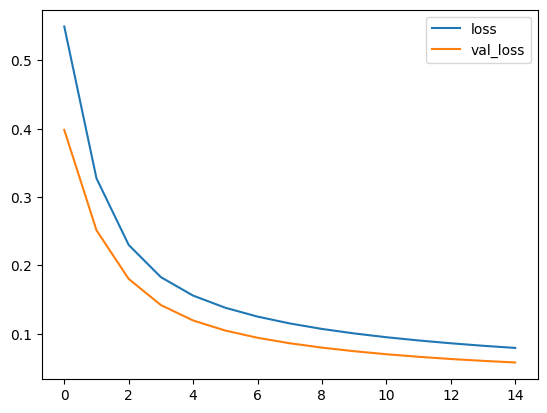

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

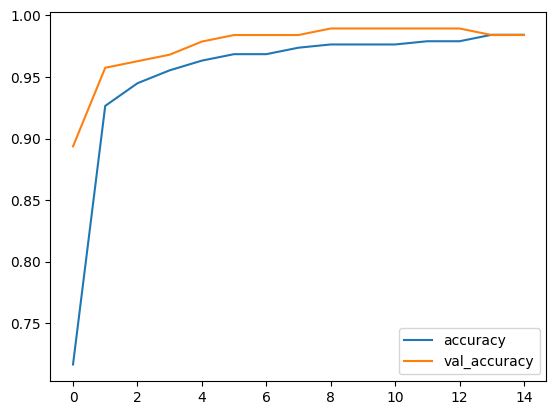

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_dataset.batch(batch_size)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9902 - loss: 0.0539 
[0.05807948485016823, 0.9840425252914429]


# **O que é batch**

In [ ]:
#Example usage of batch
dataset = tf.data.Dataset.range(9)
batches = dataset.batch(3)
batches_shuffled = batches.shuffle(3)

for batch in batches_shuffled:
  print(batch.numpy())

[0 1 2]
[3 4 5]
[6 7 8]
